In [40]:
##### K Means
import matplotlib.pyplot as plt
import seaborn as sns; 
import numpy as np
import pandas as pd


# 1. Lee el csv

In [41]:
df = pd.read_csv("credit_card_customer_data.csv")
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [42]:
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [44]:
columns = df.drop(columns=["Sl_No", "Customer Key"]).columns

e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


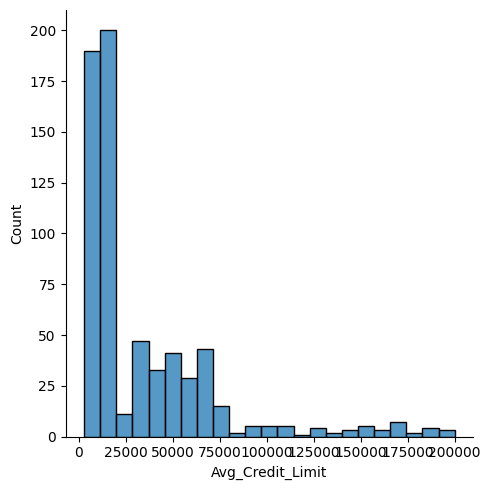

e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


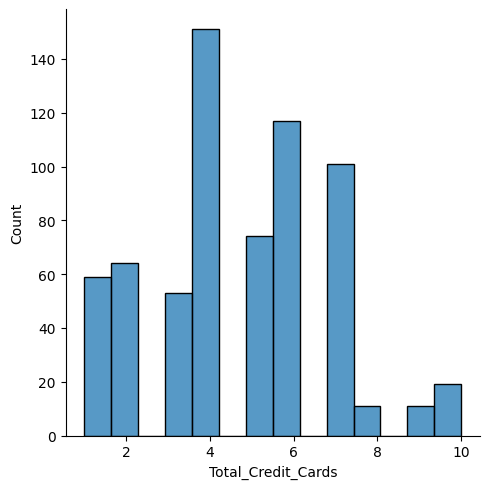

e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


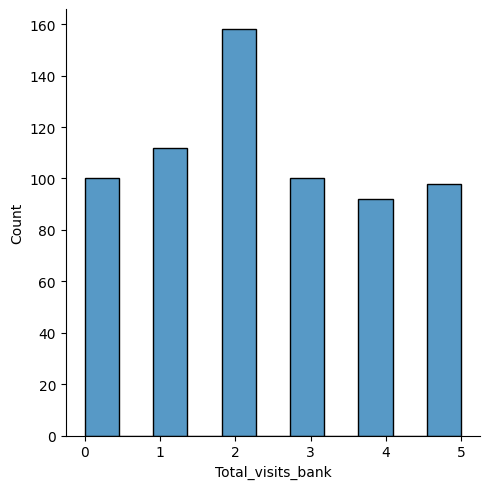

e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


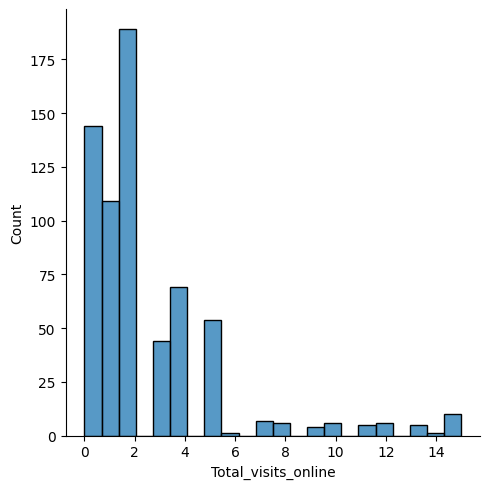

e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


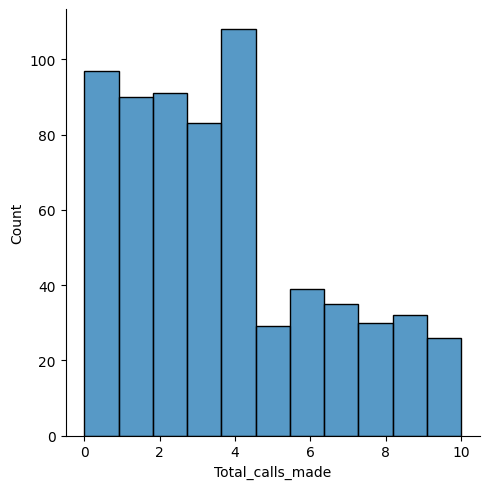

In [45]:
for i in columns:
    sns.displot(df[i])
    plt.show()

In [46]:
df.drop(columns=["Sl_No", "Customer Key"], inplace=True)

In [47]:
df.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


In [48]:
df["Total_interaction"] = df.Total_visits_bank + df.Total_visits_online + df.Total_calls_made

In [49]:
columns[-3:]

Index(['Total_visits_bank', 'Total_visits_online', 'Total_calls_made'], dtype='object')

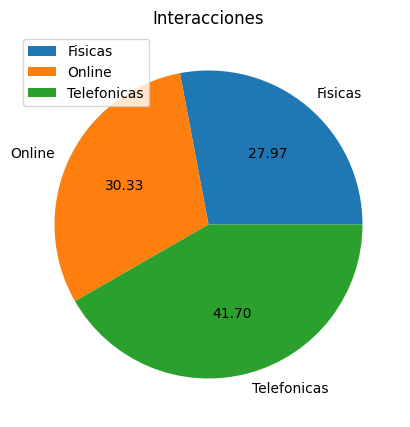

In [50]:
plt.figure(figsize=(6,5))
feature_perc=[]
for i in columns[-3:]:
    feature_perc.append((df[i].sum()/df.Total_interaction.sum()) * 100)
plt.pie(feature_perc, labels=["Fisicas", "Online", "Telefonicas"], autopct="%1.2f")
plt.legend()
plt.title("Interacciones")
plt.show()

In [51]:
df[df.duplicated(subset=None, keep="first")]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Total_interaction
162,8000,2,0,3,4,7
175,6000,1,0,2,5,7
215,8000,4,0,4,7,11
295,10000,6,4,2,3,9
324,9000,4,5,0,4,9
361,18000,6,3,1,4,8
378,12000,6,5,2,1,8
385,8000,7,4,2,0,6
395,5000,4,5,0,1,6
455,47000,6,2,0,4,6


e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

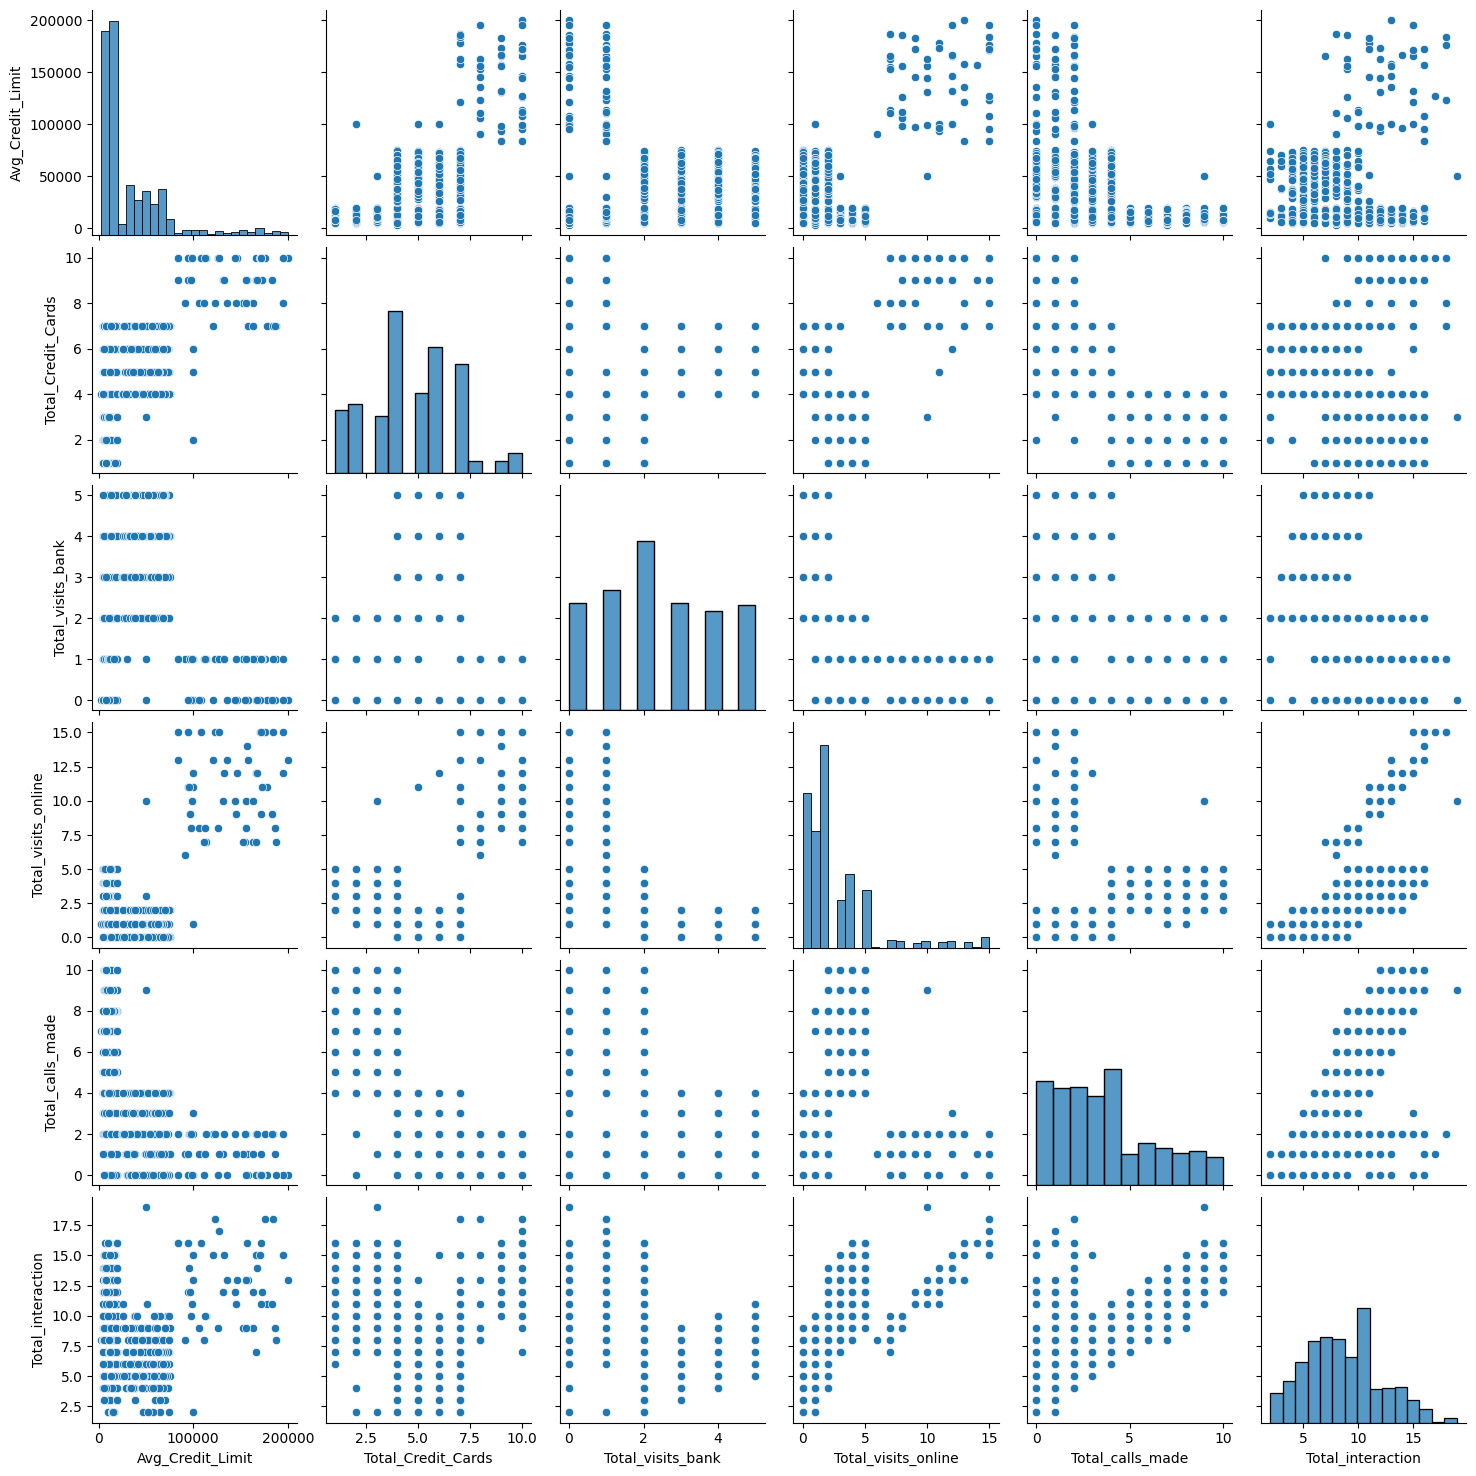

In [52]:
sns.pairplot(df)

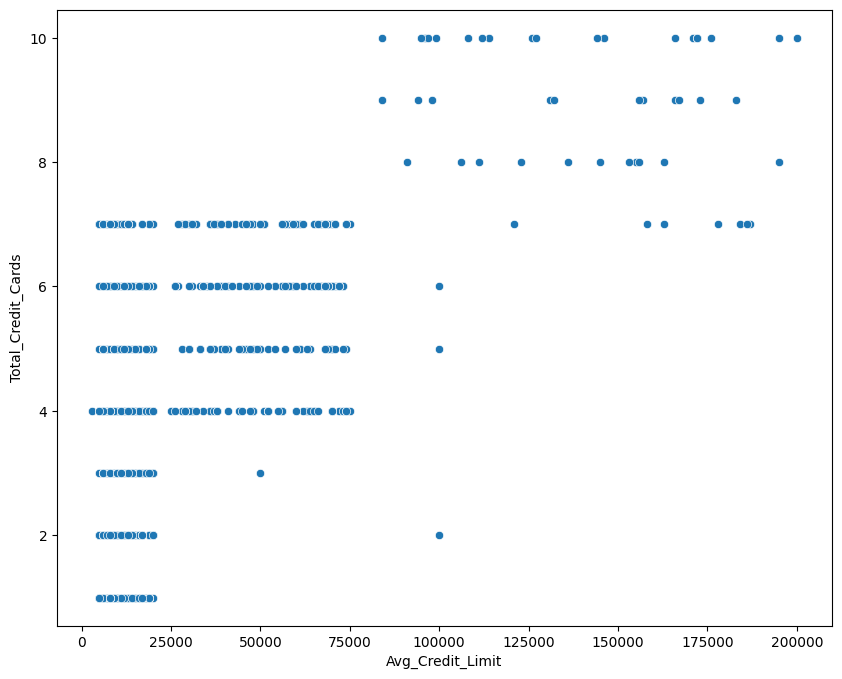

In [53]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="Avg_Credit_Limit", y="Total_Credit_Cards", data=df)
plt.show()

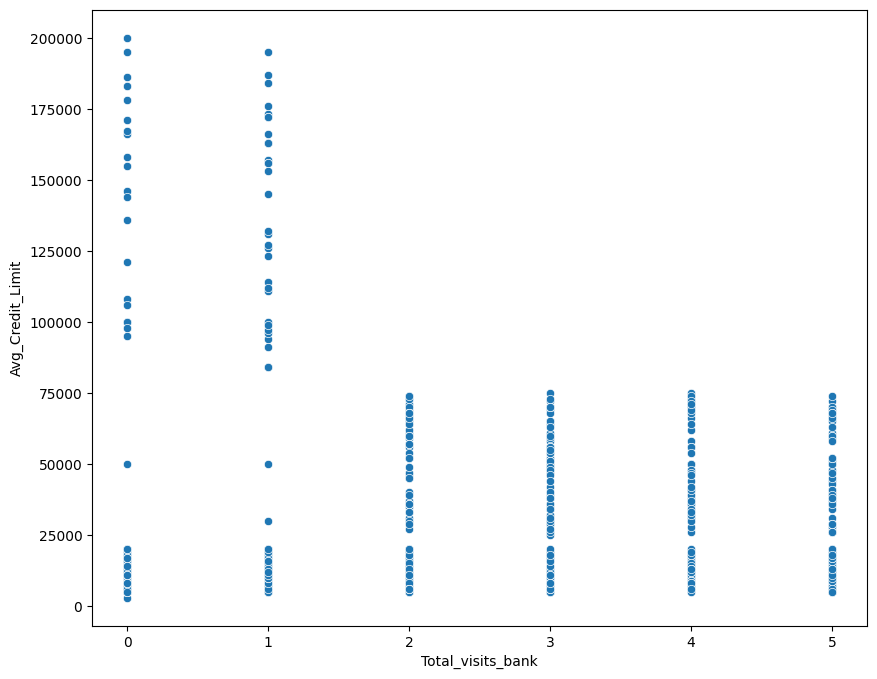

In [54]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="Total_visits_bank", y="Avg_Credit_Limit", data=df)
plt.show()

tres zonas, abajo izq, arriba izq y dere

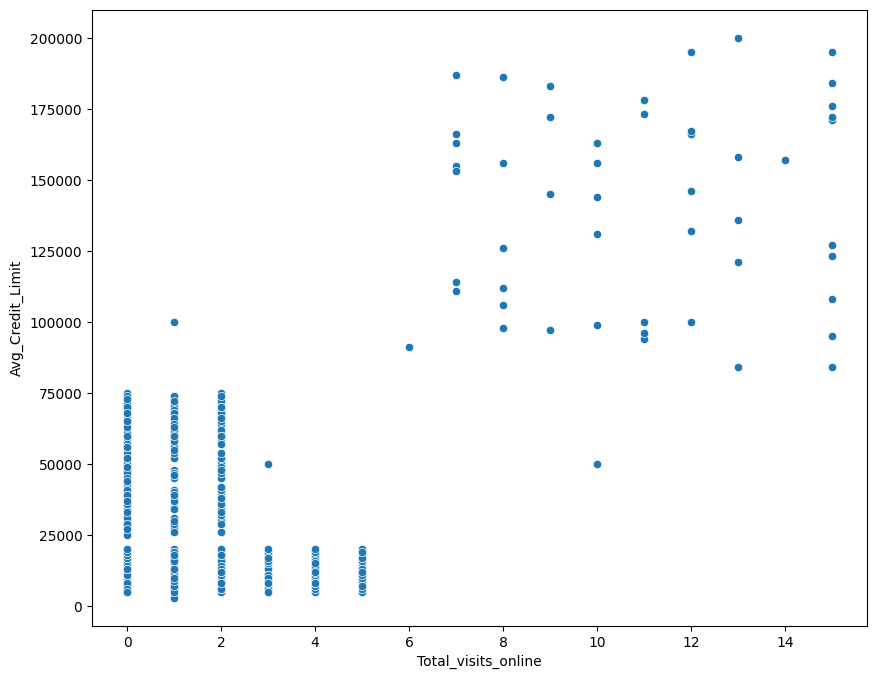

In [55]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="Total_visits_online", y="Avg_Credit_Limit", data=df)
plt.show()

tres zonas, abajo izq(hasta 2), arriba dere y abajo izq(desde 2)

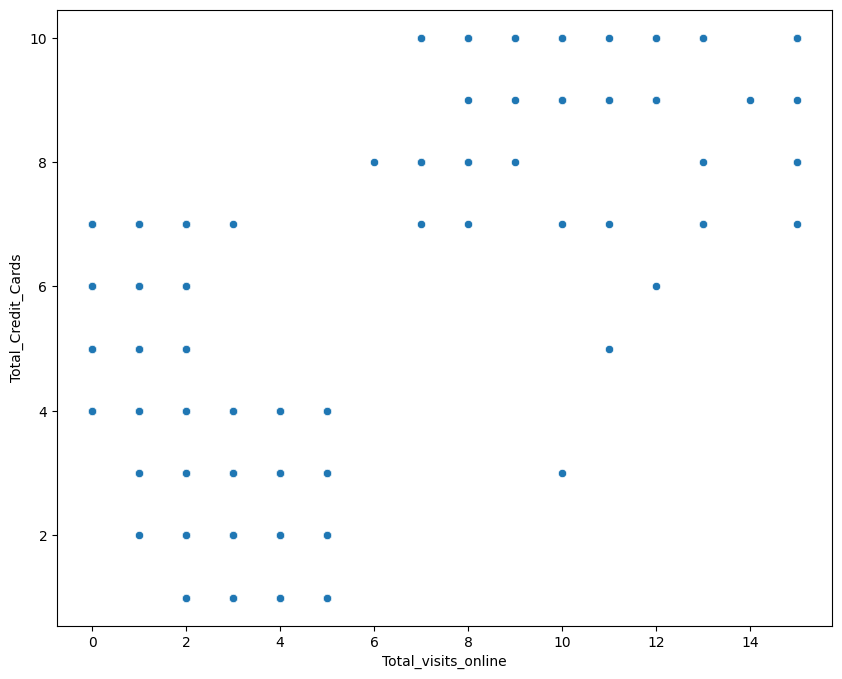

In [56]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="Total_visits_online", y="Total_Credit_Cards", data=df)
plt.show()

dos zonas, izq y dere

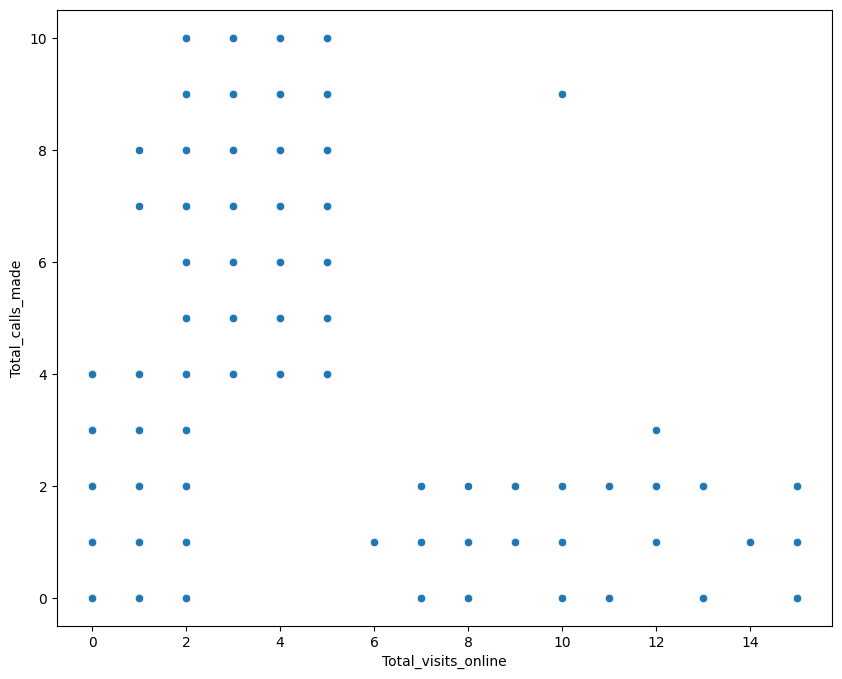

In [57]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="Total_visits_online", y="Total_calls_made", data=df)
plt.show()

dos zonas, izq y dere, o casi que 3

In [58]:
columns = df.columns
columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made', 'Total_interaction'],
      dtype='object')

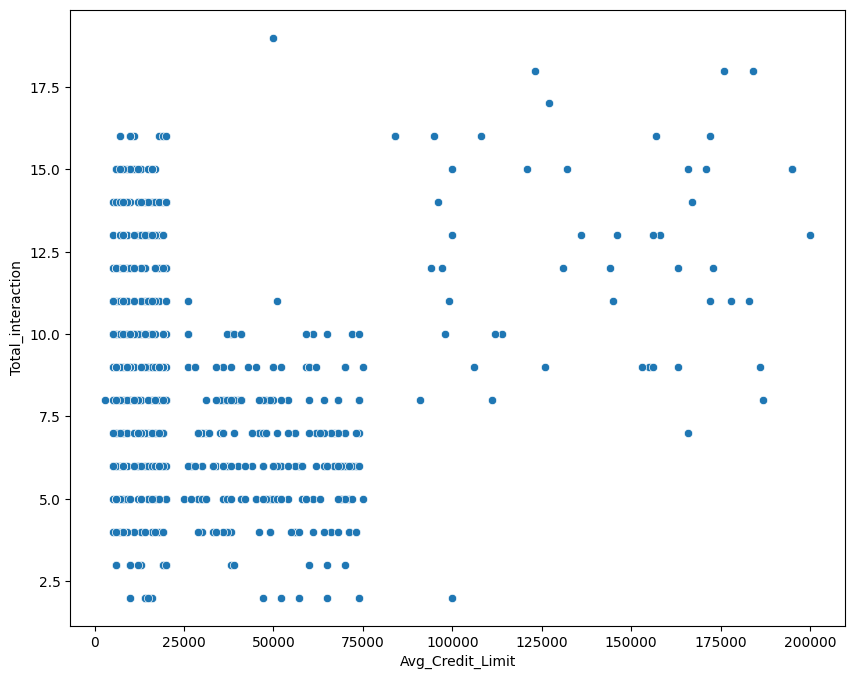

In [59]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="Avg_Credit_Limit", y="Total_interaction", data=df)
plt.show()

# 2. Aplica el kmeans

In [60]:
X = df.iloc[:,0:].values

In [61]:
X

array([[100000,      2,      1,      1,      0,      2],
       [ 50000,      3,      0,     10,      9,     19],
       [ 50000,      7,      1,      3,      4,      8],
       ...,
       [145000,      8,      1,      9,      1,     11],
       [172000,     10,      1,     15,      0,     16],
       [167000,      9,      0,     12,      2,     14]], dtype=int64)

In [62]:
df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Total_interaction
0,100000,2,1,1,0,2
1,50000,3,0,10,9,19
2,50000,7,1,3,4,8
3,30000,5,1,1,4,6
4,100000,6,0,12,3,15
...,...,...,...,...,...,...
655,99000,10,1,10,0,11
656,84000,10,1,13,2,16
657,145000,8,1,9,1,11
658,172000,10,1,15,0,16


* apreciamos un desvalanceo entre variables, tendriamos que escalar

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
scaler = MinMaxScaler()
scaled_columns = scaler.fit_transform(X)

In [65]:
scaled_columns

array([[0.49238579, 0.11111111, 0.2       , 0.06666667, 0.        ,
        0.        ],
       [0.23857868, 0.22222222, 0.        , 0.66666667, 0.9       ,
        1.        ],
       [0.23857868, 0.66666667, 0.2       , 0.2       , 0.4       ,
        0.35294118],
       ...,
       [0.72081218, 0.77777778, 0.2       , 0.6       , 0.1       ,
        0.52941176],
       [0.85786802, 1.        , 0.2       , 1.        , 0.        ,
        0.82352941],
       [0.83248731, 0.88888889, 0.        , 0.8       , 0.2       ,
        0.70588235]])

In [66]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

e:\Apps\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
e:\Apps\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
e:\Apps\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
e:\Apps\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less 

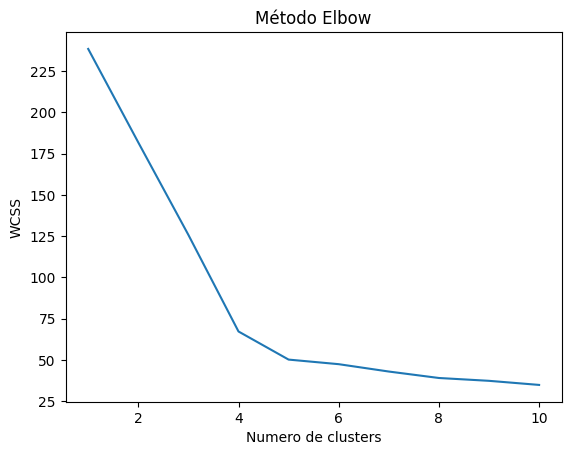

In [67]:
wcss = [] #Within cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) 
    kmeans.fit(scaled_columns) 
    wcss.append(kmeans.inertia_) 
plt.plot(range(1, 11), wcss)
plt.title('Método Elbow')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

In [68]:
kmeans = KMeans(n_clusters=3, init = "k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X)

e:\Apps\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [69]:
print(y_kmeans)

[2 2 2 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2
 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 0 2 2
 0 2 0 0 2 2 2 2 2 2 2 2 

In [70]:
Segment = pd.DataFrame(y_kmeans, columns=["Segment"]) 
Segment

,Segment
0,2
1,2
2,2
3,0
4,2
...,...
655,2
656,2
657,1
658,1


In [71]:
data = df.copy()
df_final = pd.concat([data, Segment], axis=1)
df_final

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Total_interaction,Segment
0,100000,2,1,1,0,2,2
1,50000,3,0,10,9,19,2
2,50000,7,1,3,4,8,2
3,30000,5,1,1,4,6,0
4,100000,6,0,12,3,15,2
...,...,...,...,...,...,...,...
655,99000,10,1,10,0,11,2
656,84000,10,1,13,2,16,2
657,145000,8,1,9,1,11,1
658,172000,10,1,15,0,16,1


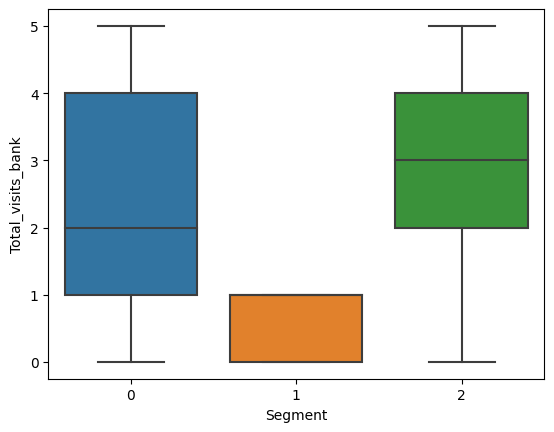

In [72]:
sns.boxplot(x="Segment", y="Total_visits_bank", data=df_final)
plt.show()

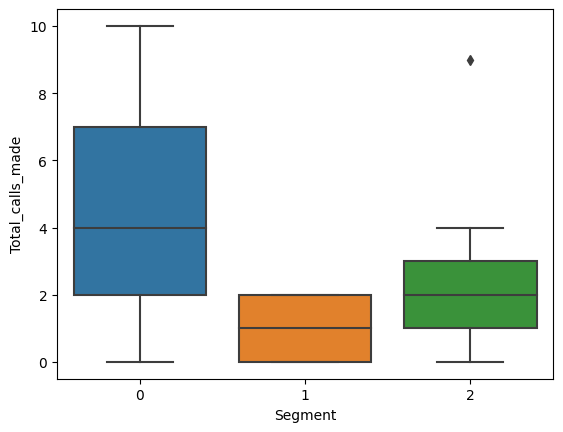

In [73]:
sns.boxplot(x="Segment", y="Total_calls_made", data=df_final)
plt.show()

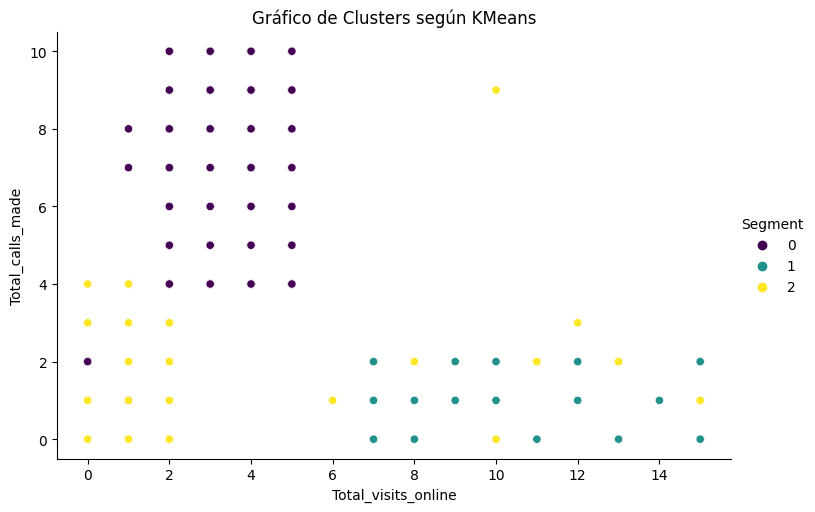

In [74]:
sns.relplot(x='Total_visits_online', y='Total_calls_made', hue='Segment', data=df_final, palette='viridis', aspect=1.5)
plt.title('Gráfico de Clusters según KMeans')
plt.show()

In [75]:
df_final.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made', 'Total_interaction',
       'Segment'],
      dtype='object')

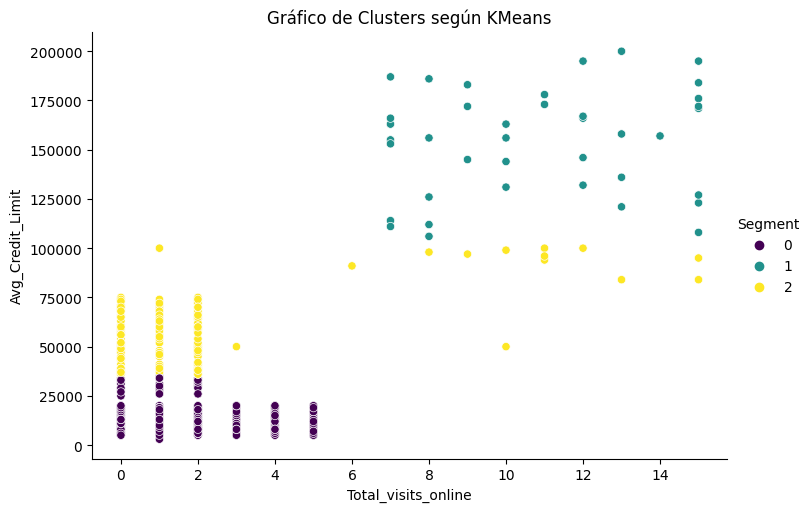

In [76]:
sns.relplot(x='Total_visits_online', y='Avg_Credit_Limit', hue='Segment', data=df_final, palette='viridis', aspect=1.5)
plt.title('Gráfico de Clusters según KMeans')
plt.show()

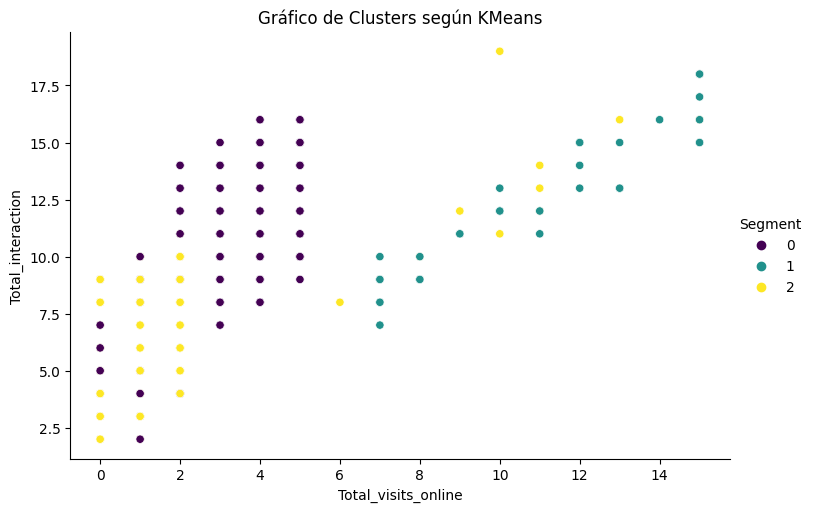

In [77]:
sns.relplot(x='Total_visits_online', y='Total_interaction', hue='Segment', data=df_final, palette='viridis', aspect=1.5)
plt.title('Gráfico de Clusters según KMeans')
plt.show()

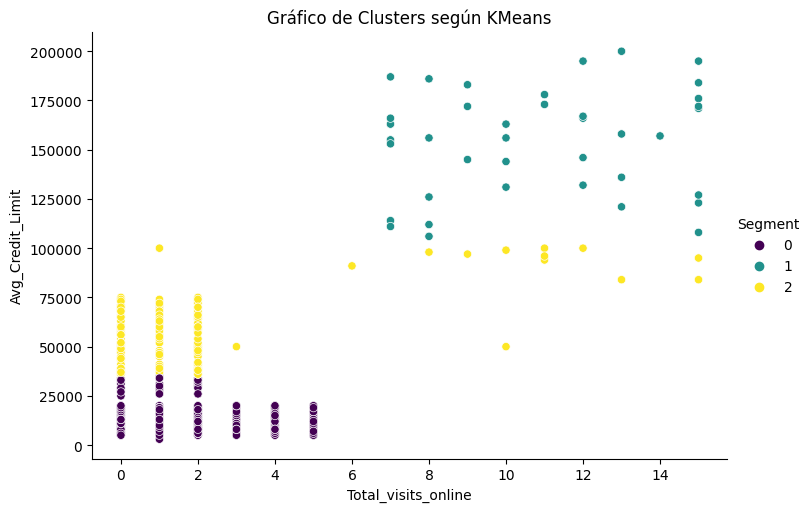

In [78]:
sns.relplot(x='Total_visits_online', y='Avg_Credit_Limit', hue='Segment', data=df_final, palette='viridis', aspect=1.5)
plt.title('Gráfico de Clusters según KMeans')
plt.show()

# 3. Interpreta el clustering resultante

* Escoge 2 variables y haz un gráfico con esas dos variables en el eje x y y
usando relplot de seaborn. Utiliza el label que asigna el kmeans para pintar
los puntos por colores.

    Repite el paso previo para varias variables.

Creo que los grupo se conforman de:
0) gente de medio poder adquisitvo, probablemente mayor por la frecunecia de las visitas.

1) gente de pococ poder aquisitivo, probablemente joven por el uso del online, y pocas tarjetas.

2) gente con mucho poder adquisitivo, probablemente edad mediana por el uso del online.


¿como podemos interpretar estos clusterings? ¿que tipo de usuarios hay en
cada cluster? Para ello, debemos poner el label del cluster al dataframe
original sin transformar, y hacer las medias de cada variable por cada grupo
(groupby)

# 4. Prueba otra k (por ejemplo haciendo un cluster mas) y reinterpreta los clusters.